In [16]:
#import imageio
import glob
import os
import time
import cv2
import tensorflow as tf
from tensorflow.keras import layers
from IPython import display
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from tensorflow import keras
from pathlib import Path
from tensorflow.keras import layers

In [17]:
from tensorflow.keras import Model, Input, regularizers, Sequential
from keras.layers import InputLayer, Flatten, Reshape
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, UpSampling2D
from tensorflow.keras.callbacks import EarlyStopping

In [18]:
from tensorflow.keras import applications
from tensorflow.keras import losses
from tensorflow.keras import optimizers
from tensorflow.keras import metrics
from keras.preprocessing import image

In [19]:
X_data = []
files = glob.glob (r"C:\Users\rahul\Videos\AutoEncoder\left\*.jpg")
for myFile in files:
    img = image.load_img(myFile, target_size=(50, 50, 3))
    img = image.img_to_array(img)
    img = img/255
    X_data.append(img)

In [20]:
Y_data = []
files = glob.glob (r"C:\Users\rahul\Videos\AutoEncoder\right\*.jpg")
for myFile in files:
    #print(myFile)
    img = image.load_img(myFile, target_size=(70, 70, 3))
    img = image.img_to_array(img)
    img = img/255
    Y_data.append(img)

In [21]:
all_data = X_data #+ Y_data

In [22]:
all_data = np.array(all_data)

In [23]:
import matplotlib.pyplot as plt
def show_image(x):
    plt.imshow(x)

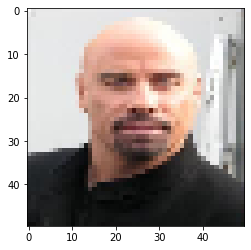

In [24]:
show_image(all_data[50])

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(all_data, test_size=0.1, random_state=32)

In [26]:
def build_autoencoder(img_shape, code_size):
    # The encoder
    encoder = Sequential()
    encoder.add(InputLayer(img_shape))
    #encoder.add(Dropout(0.1)(encoder.add(InputLayer(img_shape))))
    encoder.add(Flatten())
    encoder.add(Dense(code_size, activation='relu'))
    encoder.add(Dense(code_size, activation='relu'))
    #encoder.add(Dense(code_size, activation='sigmoid'))

    # The decoder
    decoder = Sequential()
    decoder.add(InputLayer((code_size)))
    #decoder.add(Dense(np.prod(img_shape), activation='relu'))
    decoder.add(Dense(np.prod(img_shape), activation='sigmoid'))
    decoder.add(Reshape(img_shape))

    return encoder, decoder

In [27]:
IMG_SHAPE = all_data.shape[1:]
encoder, decoder = build_autoencoder(IMG_SHAPE, 50)

inp = Input(IMG_SHAPE)
code = encoder(inp)
reconstruction = decoder(code)

autoencoder = Model(inp,reconstruction)
autoencoder.compile(optimizer='adam', loss='mse')

print(autoencoder.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 50, 50, 3)]       0         
                                                                 
 sequential_2 (Sequential)   (None, 50)                377600    
                                                                 
 sequential_3 (Sequential)   (None, 50, 50, 3)         382500    
                                                                 
Total params: 760,100
Trainable params: 760,100
Non-trainable params: 0
_________________________________________________________________
None


In [28]:
history = autoencoder.fit(x=X_train, y=X_train, epochs=50, batch_size=10,
                validation_data=[X_test, X_test])

Epoch 1/50
5/5 [==============================] - 1s 50ms/step - loss: 0.1017 - val_loss: 0.1247
Epoch 2/50
5/5 [==============================] - 0s 20ms/step - loss: 0.1001 - val_loss: 0.1188
Epoch 3/50
5/5 [==============================] - 0s 18ms/step - loss: 0.0958 - val_loss: 0.1121
Epoch 4/50
5/5 [==============================] - 0s 21ms/step - loss: 0.0886 - val_loss: 0.1053
Epoch 5/50
5/5 [==============================] - 0s 21ms/step - loss: 0.0830 - val_loss: 0.1000
Epoch 6/50
5/5 [==============================] - 0s 23ms/step - loss: 0.0758 - val_loss: 0.0943
Epoch 7/50
5/5 [==============================] - 0s 19ms/step - loss: 0.0714 - val_loss: 0.0947
Epoch 8/50
5/5 [==============================] - 0s 20ms/step - loss: 0.0686 - val_loss: 0.0923
Epoch 9/50
5/5 [==============================] - 0s 20ms/step - loss: 0.0655 - val_loss: 0.0906
Epoch 10/50
5/5 [==============================] - 0s 20ms/step - loss: 0.0629 - val_loss: 0.0946
Epoch 11/50
5/5 [============

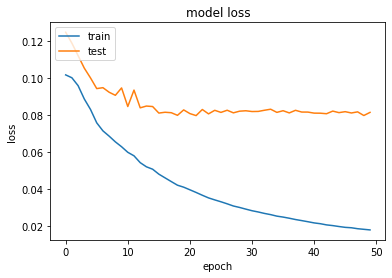

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

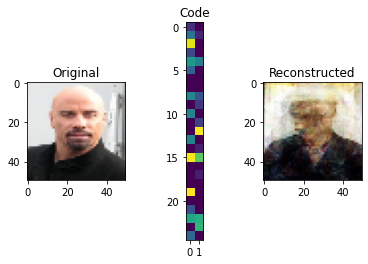

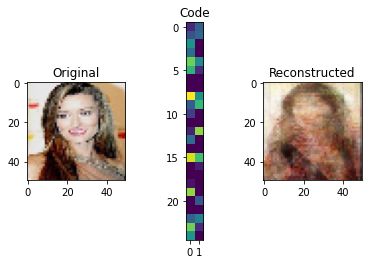

In [31]:
def visualize(img,encoder,decoder):
    """Draws original, encoded and decoded images"""
    # img[None] will have shape of (1, 32, 32, 3) which is the same as the model input
    code = encoder.predict(img[None])[0]
    reco = decoder.predict(code[None])[0]

    plt.subplot(1,3,1)
    plt.title("Original")
    show_image(img)

    plt.subplot(1,3,2)
    plt.title("Code")
    plt.imshow(code.reshape([code.shape[-1]//2,-1]))

    plt.subplot(1,3,3)
    plt.title("Reconstructed")
    show_image(reco)
    plt.show()

for i in range(2):
    img = X_test[i]
    visualize(img,encoder,decoder)